In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_TCS=pd.read_csv("TCS_stock_history.csv")
df_TCS.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [3]:
df_TCS.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [4]:
df_TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [5]:
df_TCS['Date']=pd.to_datetime(df_TCS['Date'])

In [6]:
df_TCS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [7]:
df_TCS.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [8]:
df_TCS.set_index('Date',inplace=True)

In [9]:
df_TCS.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


<AxesSubplot:xlabel='Close'>

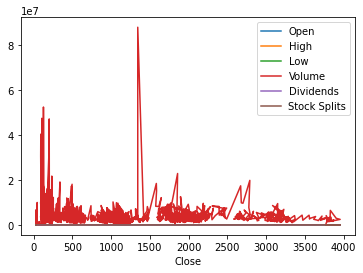

In [10]:
df_TCS.plot('Close')

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_test(df_TCS['Close'])

ADF Statistics: 4.7901003047803945
p- value: 1.0
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
## Use Techniques Differencing
                                       
df_TCS['Close First Difference']=df_TCS['Close']-df_TCS['Close'].shift(1)

In [15]:
df_TCS.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.399664
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-2.007599
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.065065


In [16]:
adf_test(df_TCS['Close First Difference'].dropna())

ADF Statistics: -14.006077356109241
p- value: 3.786204068039838e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

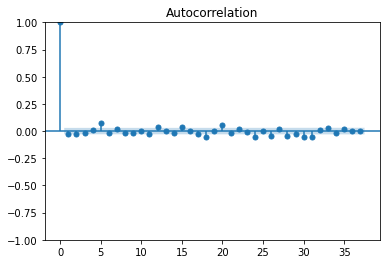

In [18]:
acf = plot_acf(df_TCS["Close First Difference"].dropna())

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


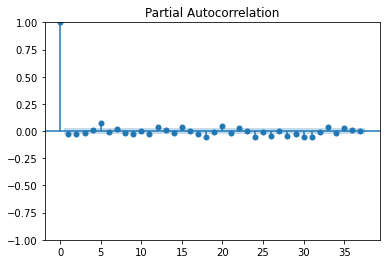

In [19]:
pacf = plot_pacf(df_TCS["Close First Difference"].dropna())

In [20]:
### split train and test data
df_TCS

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.399664
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-2.007599
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.065065
...,...,...,...,...,...,...,...,...
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,2.050049
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,-34.350098
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,-57.800049


In [21]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2018,12,1)
test_dataset_end=datetime(2021,9,30)

In [22]:
train_data=df_TCS[:train_dataset_end]
test_data=df_TCS[train_dataset_end+timedelta(days=1):test_dataset_end]

In [23]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [24]:
test_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2018-12-03,1868.062387,1873.711769,1853.279883,1866.555908,1610576,0.0,0.0,13.323120
2018-12-04,1867.120978,1901.393922,1855.822212,1893.343506,3270615,0.0,0.0,26.787598
2018-12-05,1888.776859,1900.075624,1869.004021,1889.483032,2501539,0.0,0.0,-3.860474
2018-12-06,1881.244485,1899.134197,1863.919688,1876.254150,2321216,0.0,0.0,-13.228882
2018-12-07,1869.051130,1886.799584,1857.705241,1878.607910,1680420,0.0,0.0,2.353760
...,...,...,...,...,...,...,...,...
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,2.050049
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,-34.350098
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,-57.800049


In [25]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [26]:
train_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,-0.399664
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,-2.007599
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,0.000000
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,-0.065065
...,...,...,...,...,...,...,...,...
2018-11-26,1712.704230,1751.308338,1680.220285,1738.220581,4333177,0.0,0.0,31.589478
2018-11-27,1745.659088,1786.993757,1728.098902,1779.790771,3344839,0.0,0.0,41.570190
2018-11-28,1778.613727,1872.770091,1772.493563,1867.968140,5313249,0.0,0.0,88.177368


# SARIMA model

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


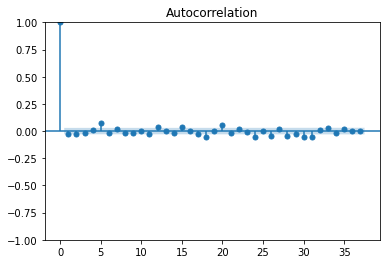

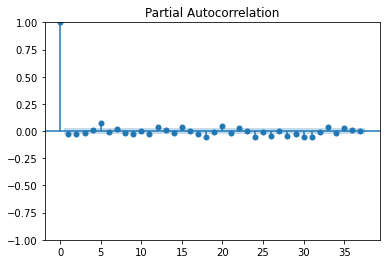

In [29]:
acf = plot_acf(df_TCS["Close First Difference"].dropna())
pacf = plot_pacf(df_TCS["Close First Difference"].dropna())

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model_SARIMA=SARIMAX(train_data['Close'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [32]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
test_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,2.050049
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,-34.350098
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,-57.800049
2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,12.750000
2021-09-30,3805.000000,3805.000000,3765.000000,3773.199951,640479,0.0,0.0,-18.699951


In [34]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2018-12-03 00:00:00
2021-09-30 00:00:00


In [54]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2018,11,26),end=datetime(2021,9,30))
residuals=test_data['Close']-pred_Sarima

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

<AxesSubplot:xlabel='Date'>

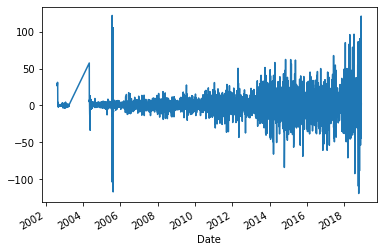

In [38]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

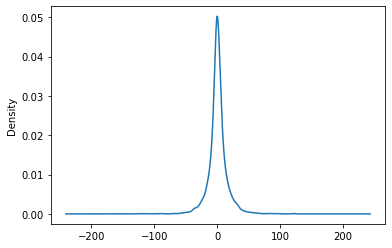

In [50]:
model_SARIMA_fit.resid.plot(kind='kde')

In [51]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Asus\AppData\Local\Temp\ipykernel_15972\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [40]:
test_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close First Difference
Date,,,,,,,,
2018-12-03,1868.062387,1873.711769,1853.279883,1866.555908,1610576,0.0,0.0,13.323120
2018-12-04,1867.120978,1901.393922,1855.822212,1893.343506,3270615,0.0,0.0,26.787598
2018-12-05,1888.776859,1900.075624,1869.004021,1889.483032,2501539,0.0,0.0,-3.860474
2018-12-06,1881.244485,1899.134197,1863.919688,1876.254150,2321216,0.0,0.0,-13.228882
2018-12-07,1869.051130,1886.799584,1857.705241,1878.607910,1680420,0.0,0.0,2.353760
...,...,...,...,...,...,...,...,...
2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,2.050049
2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,-34.350098
2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,-57.800049


<AxesSubplot:xlabel='Date'>

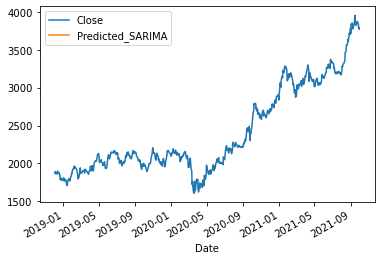

In [52]:
test_data[['Close','Predicted_SARIMA']].plot()